__Image Classification (Fashion)__

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [9]:
train_images.shape #60,000 images, each being 28x28 pixel

(60000, 28, 28)

In [17]:
train_labels.shape

(60000,)

In [13]:
train_labels #labels having values: 0-9 ie 10 categories

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

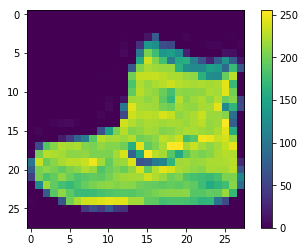

In [24]:
plt.imshow(train_images[0])
plt.colorbar() #image pixel values range from 0-255 (color)

In [25]:
train_images = train_images/255.0 #to scale down pixel values to range from 0-1 instead
test_images = test_images/255.0

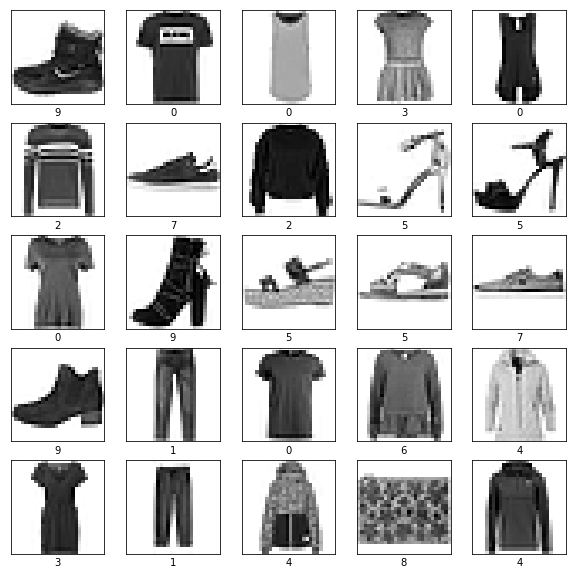

In [28]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])


In [29]:
#From pictures, construct label names
label_names = ['T-shirt', 'Pants','Sweater','Dress','Jacket',
              'Sandal', 'Shirt','Sneaker','Bag','Boot']

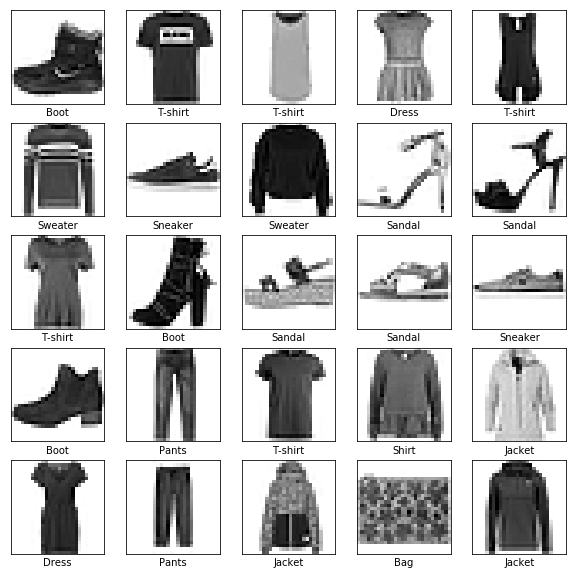

In [30]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[i]])

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #first layer transforms the image from a 2D array of 28x28 to a 1D array of 28x28
    keras.layers.Dense(128, activation=tf.nn.relu), #hidden layer has 128 neurons
    keras.layers.Dense(10,activation=tf.nn.softmax) #last layer has 10 neurons, softmax returns an array of 10 probability scores which sum up to 1. Each being the probability that the image is classified under that label
])

In [32]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [33]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.4916 - acc: 0.8255
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.3748 - acc: 0.8650
Epoch 3/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.3369 - acc: 0.8760
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.3132 - acc: 0.8852
Epoch 5/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.2960 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2805 - acc: 0.8967
Epoch 7/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2697 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2568 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2448 - acc: 0.9085
Epoch 10/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.2375 - acc: 0.9105

__From 1st to 10th epoch:
Loss decreased from 0.4916 to 0.2375
Accuracy increased from 0.8255 to 0.9105__

In [34]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/step
Test accuracy: 0.8821


__Accuracy for test data < Accuracy for training data
(Could be due to overfitting)__

In [35]:
predictions = model.predict(test_images)

In [36]:
 predictions[0]

array([3.20280164e-10, 5.52539889e-11, 4.62078396e-11, 1.45482645e-11,
       3.23296323e-09, 9.41113976e-04, 3.28205907e-09, 4.28235047e-02,
       1.75101995e-08, 9.56235349e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [39]:
test_labels[0]

9